# **Thêm thư viện**

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Đọc dataset**

In [2]:
mnist=keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Trực quan hoá dữ liệu

In [3]:
#Số data point trong tập train và test
print(X_train.shape[0])
print(X_test.shape[0])

60000
10000


In [4]:
import matplotlib.pyplot as plt
sample=16
image=X_train[sample]
#print(image)

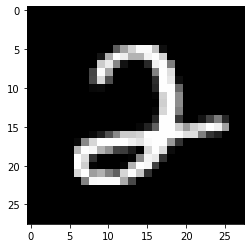

In [5]:
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

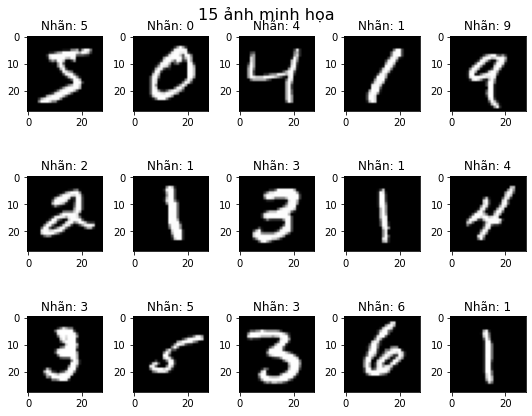

In [6]:
num_row = 3
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
fig.suptitle("15 ảnh minh họa", fontsize=16)
for i in range(num_row * num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Nhãn: {}'.format(Y_train[i]))
plt.tight_layout()
plt.show()

# **Chuẩn bị huấn luyện model**

In [7]:
# network and training
EPOCHS = 50
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   #  # số node đầu ra = số lượng lớp = 10 lớp 0,1,,...,9
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#xem thêm: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html

#normalize in [0,1]
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

#one-hot-ecoder
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

60000 train samples
10000 test samples


In [ ]:
print(Y_train[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# **Xây dựng mô hình**

In [8]:
#build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
   		input_shape=(RESHAPED,),
   		name='dense_layer', activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN,
   		name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dense(NB_CLASSES,
   		name='dense_layer_3', activation='softmax'))


# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


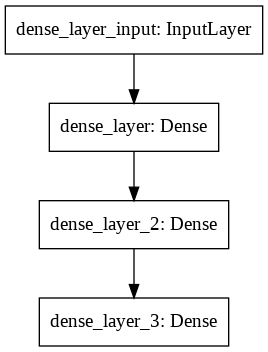

In [9]:
from tensorflow.keras.utils import  plot_model
plot_model(model, to_file='model_plot.png',show_layer_names=True)

In [10]:
model.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# **Huấn luyện mô hình**

In [11]:
model.fit(X_train, Y_train,
		batch_size=BATCH_SIZE, epochs=EPOCHS,
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 1.4228 - accuracy: 0.6385 - val_loss: 0.7181 - val_accuracy: 0.8378
Epoch 2/50
375/375 [==============================] - 1s 4ms/step - loss: 0.5785 - accuracy: 0.8587 - val_loss: 0.4436 - val_accuracy: 0.8871
Epoch 3/50
375/375 [==============================] - 2s 4ms/step - loss: 0.4302 - accuracy: 0.8853 - val_loss: 0.3706 - val_accuracy: 0.9007
Epoch 4/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3738 - accuracy: 0.8965 - val_loss: 0.3330 - val_accuracy: 0.9083
Epoch 5/50
375/375 [==============================] - 1s 4ms/step - loss: 0.3415 - accuracy: 0.9041 - val_loss: 0.3101 - val_accuracy: 0.9108
Epoch 6/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3189 - accuracy: 0.9109 - val_loss: 0.2925 - val_accuracy: 0.9157
Epoch 7/50
375/375 [==============================] - 1s 4ms/step - loss: 0.3019 - accuracy: 0.9143 - val_loss: 0.2812 - val_accuracy: 0.9191
Epoch 

# **Kiểm tra kết quả mô hình**

In [ ]:
#evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)
train_loss, train_acc = model.evaluate(X_train, Y_train)
print('Train accuracy:', train_acc)
# making prediction
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1165 - accuracy: 0.9650
Test accuracy: 0.9649999737739563
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1026 - accuracy: 0.9714
Train accuracy: 0.9713666439056396


Confusion_matrix

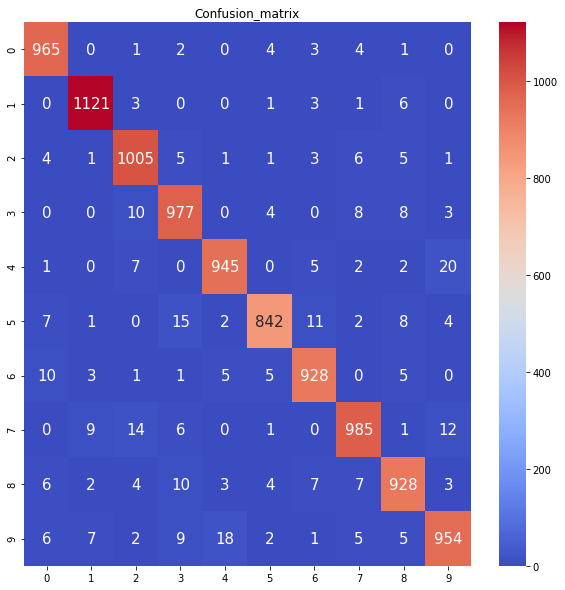

In [ ]:
y_test=np.argmax(Y_test,axis=1)
y_pred=np.argmax(Y_pred,axis=1)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True,ax = ax,fmt='g',annot_kws={"size": 15},cmap='coolwarm')
plt.title('Confusion_matrix')
plt.show()